Rossby radius:

$L_r = \frac{NH}{n\pi f_0}$

$C_i = (\pi i)^{-1} \int_{-h}^0 Ndz$

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import gsw
import cmocean as cm
# import xrftd
import matplotlib.colors as colors

In [2]:
import xrft

In [3]:
import nc_time_axis

In [4]:
from dask.distributed import Client
import dask
import os

# os.environ["MALLOC_TRIM_THRESHOLD_"] = str(dask.config.get("distributed.nanny.environ.MALLOC_TRIM_THRESHOLD_"))
client =Client(n_workers=8, threads_per_worker=1, memory_limit="4 GiB",local_directory="/home1/scratch/jmartine/tmp")
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 8
Total threads: 8,Total memory: 32.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46045,Workers: 8
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 32.00 GiB
Comm: tcp://127.0.0.1:58134,Total threads: 1
Dashboard: http://127.0.0.1:60545/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:54279,


In [5]:
from utils import Import_Expt_Front, date_fmt

In [6]:
grid = xr.open_dataset('/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/ICE-CHANEL/ice_canal_HR_output/GRID/domain_zgr_800x1200x50xr.nc')

In [7]:
folder = '/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/ICE-CHANEL/ice_canal_HR_output/'
EXF = Import_Expt_Front(folder)

In [8]:
exp_filter = ['expt_001','expt_002','expt_003','expt_004','expt_005','expt_007','expt_008','expt_009','expt_010','expt_250m_test']

In [9]:
dataset_gridW_1d = EXF.import_multipe_expt('grid_W',vars_of_interest=['bn2'],expt_filter=exp_filter,freq='1d',chunks={'time_counter':1})


In [10]:
N = np.sqrt(dataset_gridW_1d.bn2_006)

In [11]:
dz = grid.e3w_0.isel(y=0,x=0).squeeze().values[np.newaxis,:,np.newaxis,np.newaxis]

In [12]:
C1 = 1/np.pi * (N*dz).sum('depthw') 

In [13]:
f = 1.432e-4 # reference to 80°N
R1 = C1/f

In [14]:
R1_ts = R1.mean(("x","y")).compute()

/home1/datahome/jmartine/datawork/conda-env/jupyter-lab/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home1/datahome/jmartine/datawork/conda-env/jupyter-lab/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home1/datahome/jmartine/datawork/conda-env/jupyter-lab/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home1/datahome/jmartine/datawork/conda-env/jupyter-lab/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home1/datahome/jmartine/datawork/conda-env/jupyter-lab/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in sqrt
  return fu

In [15]:
R1_ts.to_netcdf("./storage/Rossby_radius.nc")
# R1_ts=xr.open_dataset("./storage/Rossby_radius.nc")

In [16]:
R1_ts_std = R1.std(("x","y")).compute()

In [17]:
R1_ts_std.to_netcdf("./storage/Rossby_radius_STD.nc")
# R1_ts_std=xr.open_dataset("./storage/Rossby_radius_STD.nc")

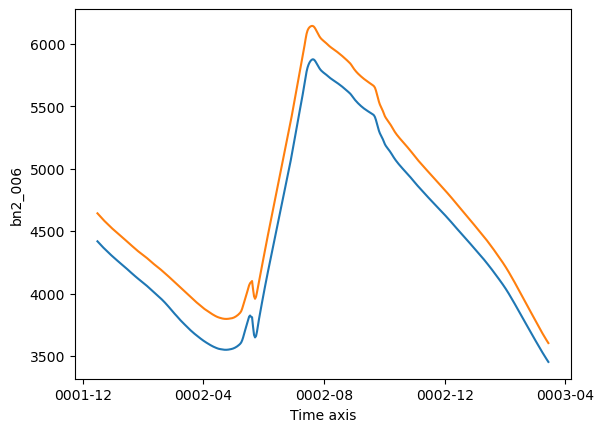

In [20]:
R1_ts.plot()
(R1_ts + R1_ts_std).plot()

In [21]:
R1_ts.groupby("time_counter.season").mean().compute()

<xarray.DataArray 'bn2_006' (season: 4)> Size: 32B
array([4167.8302598 , 5315.91652852, 3654.59391948, 5070.59407427])
Coordinates:
  * season   (season) object 32B 'DJF' 'JJA' 'MAM' 'SON'

In [22]:
R1_ts.mean().compute()

<xarray.DataArray 'bn2_006' ()> Size: 8B
array(4459.18805679)